# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,age,cp,thalach,oldpeak,ca,thal,target
0,63,3,150,2.3,0,1,1
1,37,2,187,3.5,0,2,1
2,41,1,172,1.4,0,2,1
3,56,1,178,0.8,0,2,1
4,57,0,163,0.6,0,2,1


## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
print(X_train)

[[ 58.    2.  173.    3.2   2.    3. ]
 [ 52.    0.  160.    0.    1.    2. ]
 [ 54.    2.  165.    1.6   0.    3. ]
 ...
 [ 56.    3.  162.    1.9   0.    3. ]
 [ 47.    2.  156.    0.    0.    2. ]
 [ 58.    1.  160.    1.8   0.    2. ]]


In [6]:
print(y_train)

[0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0
 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0
 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0
 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1
 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0
 0 0 1 1 0]


In [7]:
print(X_test)

[[7.00e+01 0.00e+00 1.25e+02 2.60e+00 0.00e+00 3.00e+00]
 [6.40e+01 3.00e+00 1.55e+02 6.00e-01 0.00e+00 3.00e+00]
 [5.90e+01 3.00e+00 1.59e+02 2.00e-01 0.00e+00 3.00e+00]
 [6.00e+01 0.00e+00 1.41e+02 2.80e+00 1.00e+00 3.00e+00]
 [6.20e+01 2.00e+00 1.46e+02 1.80e+00 3.00e+00 3.00e+00]
 [4.80e+01 0.00e+00 1.66e+02 5.00e-01 0.00e+00 3.00e+00]
 [4.00e+01 0.00e+00 1.14e+02 2.00e+00 0.00e+00 3.00e+00]
 [6.30e+01 0.00e+00 1.47e+02 1.40e+00 1.00e+00 3.00e+00]
 [5.60e+01 0.00e+00 1.33e+02 4.00e+00 2.00e+00 3.00e+00]
 [6.30e+01 0.00e+00 1.32e+02 1.80e+00 3.00e+00 3.00e+00]
 [5.70e+01 2.00e+00 1.73e+02 2.00e-01 1.00e+00 3.00e+00]
 [4.90e+01 0.00e+00 1.63e+02 0.00e+00 0.00e+00 2.00e+00]
 [6.50e+01 0.00e+00 1.27e+02 2.80e+00 1.00e+00 3.00e+00]
 [4.90e+01 1.00e+00 1.71e+02 6.00e-01 0.00e+00 2.00e+00]
 [5.00e+01 2.00e+00 1.58e+02 1.60e+00 0.00e+00 2.00e+00]
 [5.10e+01 2.00e+00 1.43e+02 1.20e+00 0.00e+00 2.00e+00]
 [5.20e+01 0.00e+00 1.47e+02 1.00e-01 3.00e+00 3.00e+00]
 [4.80e+01 2.00e+00 1.75e+02 0.

In [8]:
print(y_test)

[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1]


## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #avoid data leakage

In [10]:
print(X_train)

[[ 0.35256528  0.9870291   1.01189274  1.72483977  1.22723311  1.12135917]
 [-0.31068598 -0.91982712  0.45363971 -0.92348745  0.25993479 -0.45968761]
 [-0.08960223  0.9870291   0.66835241  0.40067616 -0.70736353  1.12135917]
 ...
 [ 0.13148153  1.94045721  0.53952479  0.64895684 -0.70736353  1.12135917]
 [-0.86339537  0.9870291   0.28186954 -0.92348745 -0.70736353 -0.45968761]
 [ 0.35256528  0.03360099  0.45363971  0.56619661 -0.70736353 -0.45968761]]


In [11]:
print(X_test.dtype)

float64


## Training the K-NN model on the Training set

In [12]:
from math import sqrt
class KNN():
  def __init__(self,k):
    self.k=k
    print(self.k)
  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[]#calculate distances from a test sample to every sample in a training set
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1])#sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(self.k): #get first k samples
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neighbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions


In [13]:
model=KNN(5) #our model
model.fit(X_train,y_train)

5


In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
predictions=model.predict(X_test)#our model's predictions

## Making the Confusion Matrix to compare both models

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[22 11]
 [ 4 39]]


0.8026315789473685

In [18]:
cm = confusion_matrix(y_test, predictions) #our model
print(cm)
accuracy_score(y_test, predictions)

[[22 11]
 [ 4 39]]


0.8026315789473685

## Visualising the Test set results 

C:\Users\sanja\AppData\Local\Temp\ipykernel_13596\223238803.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


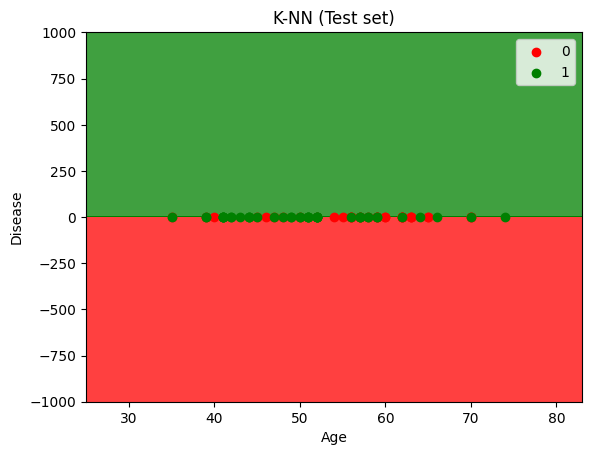

In [32]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
X_grid = np.zeros((X1.ravel().shape[0], 6))  # Create a zero matrix with 6 features
X_grid[:, 0] = X1.ravel()  # Assign first feature
X_grid[:, 1] = X2.ravel()  # Assign second feature
plt.contourf(X1, X2, classifier.predict(sc.transform(X_grid)).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Disease')
plt.legend()
plt.show()